In [2]:
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()

In [3]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
from random import *

In [4]:
data_train=pd.read_csv(r"C:\Users\archa\OneDrive\Desktop\Downloads\fashion-mnist_train.csv",header=0)
data_train

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59995,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59996,1,0,0,0,0,0,0,0,0,0,...,73,0,0,0,0,0,0,0,0,0
59997,8,0,0,0,0,0,0,0,0,0,...,160,162,163,135,94,0,0,0,0,0
59998,8,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
data_train.shape

(60000, 785)

In [6]:
# 0	T-shirt/top
# 1	Trouser
# 2	Pullover
# 3	Dress
# 4	Coat
# 5	Sandal
# 6	Shirt
# 7	Sneaker
# 8	Bag
# 9	Ankle boot

In [7]:
data=data_train.drop('label',axis=1)
data.head()

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,5,0,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,1,2,0,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


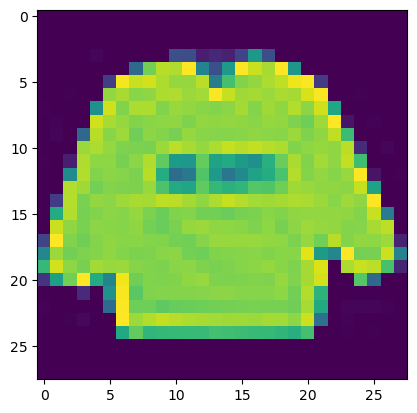

In [8]:
a=data.iloc[0].values.reshape(28,28)
plt.imshow(a)

In [9]:
data_train['label'][0]

2

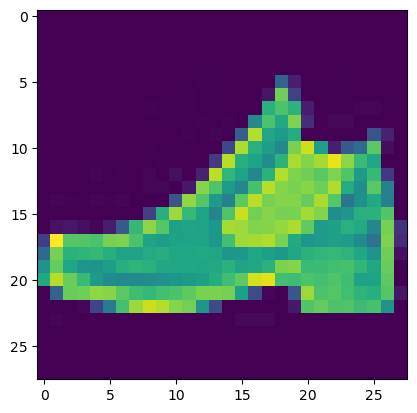

In [10]:
a=data.iloc[1].values.reshape(28,28)
plt.imshow(a)

In [11]:
data_train['label'][1]

9

In [12]:
train=data_train.drop('label',axis=1).transpose()
print(train.shape)

(784, 60000)


In [13]:
labels=data_train['label'].values.reshape(1,60000)
print(labels.shape)

(1, 60000)


In [14]:
train=np.array(train/255.0)
train

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [15]:
label_dev=np.zeros((60000,10))
print(label_dev[0])
label_dev[np.arange(60000),labels]=1
label_dev[1]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


array([0., 0., 0., 0., 0., 0., 0., 0., 0., 1.])

In [16]:
labels=label_dev.transpose()
labels

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 1., 1., 0.],
       [0., 1., 0., ..., 0., 0., 0.]])

In [17]:
labels.shape

(10, 60000)

In [18]:
n_dim=784
n1=5
n2=10
tf.reset_default_graph()
cost_hiostory=np.empty(shape=[1],dtype=float)
x=tf.placeholder(tf.float32,[n_dim,None])
y=tf.placeholder(tf.float32,[10,None])
learning_rate=tf.placeholder(tf.float32,shape=())
w1=tf.Variable(tf.truncated_normal([n1,n_dim],stddev=.1))
b1=tf.Variable(tf.zeros([n1,1]))
w2=tf.Variable(tf.truncated_normal([n2,n1],stddev=.1))
b2=tf.Variable(tf.zeros([n2,1]))
z1=tf.nn.relu(tf.matmul(w1,x)+b1)
z2=tf.matmul(w2,z1)+b2
y_=tf.nn.softmax(z2,0)

In [19]:
cost=-tf.reduce_mean(y*tf.log(y_)+(1-y)*tf.log(1-y_))
optimizer=tf.train.AdamOptimizer(learning_rate).minimize(cost)
init=tf.global_variables_initializer()

In [20]:
training_epocs=500
sess=tf.Session()
sess.run(init)
cost_history=[]
for epoch in range(training_epocs+1):
    sess.run(optimizer,feed_dict={x:train,y:labels,learning_rate:0.001})
    cost_=sess.run(cost,feed_dict={x:train,y:labels})
    cost_history=np.append(cost_history,cost_)
    if (epoch % 20==0) :
        print('reached epoch',epoch,' cost j',cost_)

reached epoch 0  cost j 0.32489866
reached epoch 20  cost j 0.3118317
reached epoch 40  cost j 0.29389635
reached epoch 60  cost j 0.27765036
reached epoch 80  cost j 0.26192647
reached epoch 100  cost j 0.2413993
reached epoch 120  cost j 0.21451765
reached epoch 140  cost j 0.18821163
reached epoch 160  cost j 0.17000285
reached epoch 180  cost j 0.15907858
reached epoch 200  cost j 0.15117204
reached epoch 220  cost j 0.14337413
reached epoch 240  cost j 0.13563523
reached epoch 260  cost j 0.12905385
reached epoch 280  cost j 0.123840205
reached epoch 300  cost j 0.11981867
reached epoch 320  cost j 0.11665104
reached epoch 340  cost j 0.1140607
reached epoch 360  cost j 0.11186514
reached epoch 380  cost j 0.109954506
reached epoch 400  cost j 0.10826107
reached epoch 420  cost j 0.10674261
reached epoch 440  cost j 0.10536975
reached epoch 460  cost j 0.10412244
reached epoch 480  cost j 0.10298495
reached epoch 500  cost j 0.10194366


In [21]:
data_test=pd.read_csv(r"C:\Users\archa\OneDrive\Desktop\Downloads\fashion-mnist_test.csv",header=0)
data_test

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0,0,0,0,0,0,0,0,9,8,...,103,87,56,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,34,0,0,0,0,0,0,0,0,0
2,2,0,0,0,0,0,0,14,53,99,...,0,0,0,0,63,53,31,0,0,0
3,2,0,0,0,0,0,0,0,0,0,...,137,126,140,0,133,224,222,56,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,0,0,0,0,0,0,0,0,0,0,...,32,23,14,20,0,0,1,0,0,0
9996,6,0,0,0,0,0,0,0,0,0,...,0,0,0,2,52,23,28,0,0,0
9997,8,0,0,0,0,0,0,0,0,0,...,175,172,172,182,199,222,42,0,1,0
9998,8,0,1,3,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


In [22]:
data_test.shape

(10000, 785)

In [23]:
labels=data_test['label'].values.reshape(10000)
print(labels.shape)

(10000,)


In [24]:
label_t=np.zeros((10000,10))
print(label_dev[0])
label_t[np.arange(10000),labels]=1
label_t[0]

[0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]


array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [25]:
label_t.shape

(10000, 10)

In [26]:
labels=label_t.transpose()
labels.shape

(10, 10000)

In [28]:
train_t=data_test.drop('label',axis=1).transpose()
print(train_t.shape)

(784, 10000)


In [29]:
correct_prediction=tf.equal(tf.arg_max(y_,0),tf.arg_max(y,0))
accuracy=tf.reduce_mean(tf.cast(correct_prediction,'float'))
print('accuracy',accuracy.eval({x:train_t,y:labels,learning_rate:0.001},session=sess))

Instructions for updating:
Use `tf.math.argmax` instead
accuracy 0.7599
